## Import required packages

In [1]:
import numpy as np 
import torch 
from torchvision import datasets,transforms
import matplotlib.pyplot as plt 
import seaborn as sns
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
import time
import tqdm as tqdm
from torch.autograd import Variable
import torchvision.models as models
from torchvision.models import resnet18
from torch import nn

if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

## Defining our Transforms

In [2]:
transform=transforms.Compose([transforms.ToTensor()])

## Gathering the train and test data


In [3]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transform)
test_data=datasets.MNIST('data',train=False,download=True,transform=transform)

## Defining our Train, Valid and Test Dataloaders

In [4]:
valid_size=0.2

# IMPORTANT 
batch_size=100

num_workers=0

train_length = len(train_data)

# obtain training dataset indices that will be used for validation dataset
indices = list(range(train_length))

np.random.shuffle(indices)
split = int(np.floor(valid_size * train_length))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders for train, test and validation dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [5]:
# This is for debugging
train_idx.__len__(),valid_idx.__len__()

(48000, 12000)

In [6]:
# Printing the length of our train, valid and test dataloaders
# NOTE : Here batch size is 20
len(train_loader),len(valid_loader),len(test_loader)

(480, 120, 100)

In [7]:
# checking our data
dataiter=iter(train_loader)
images,labels=next(dataiter)

train_filter1 = np.where((labels == 0 ) | (labels == 1))
images1, labels1 = images[train_filter1], labels[train_filter1]

print(len(images1), len(labels1))

19 19


## Visualizing 0's and 1's


In [8]:
print(images1, images1.shape, len(images1), images1[0].shape)
print()
print(labels1,labels1.shape,len(labels1))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

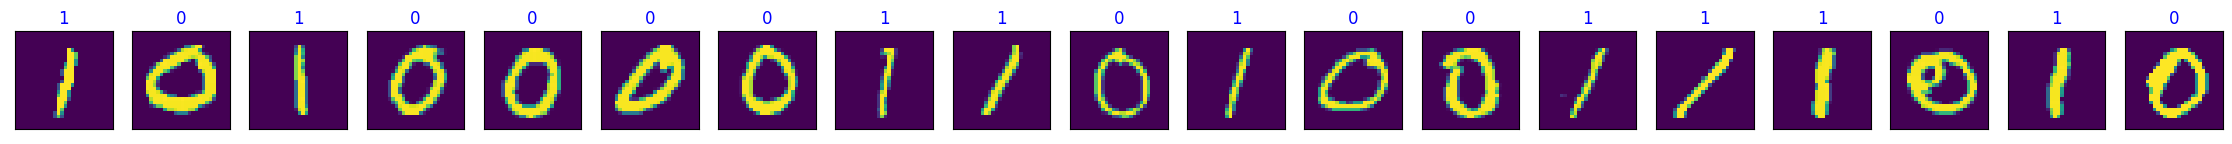

In [9]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels1)):
    ax=fig.add_subplot(2,20,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images1[i]))
    ax.set_title(labels1[i].item(),color='blue')

## Visualizing 2's and 3's

In [10]:
train_filter2 = np.where((labels == 2 ) | (labels == 3))
images2, labels2 = images[train_filter2], labels[train_filter2]

print(len(images2), len(labels2))




22 22


In [11]:
print(images2, images2.shape, len(images2), images2[0].shape)
print()
print(labels2,labels2.shape,len(labels2))

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

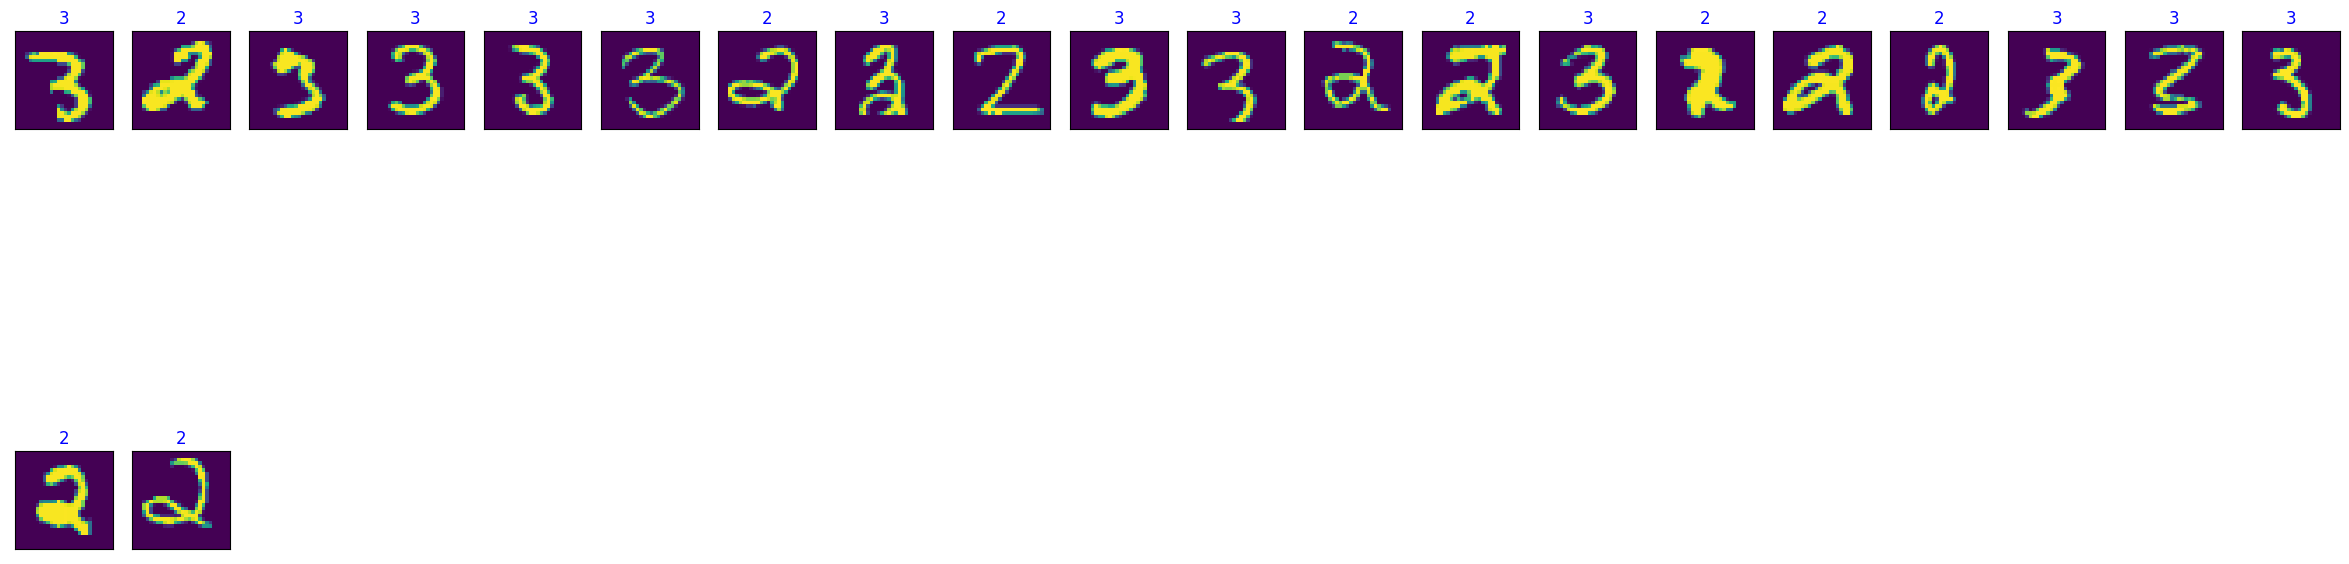

In [12]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels2)):
    ax=fig.add_subplot(2,20,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images2[i]))
    ax.set_title(labels2[i].item(),color='blue')

## Visualizing 4's and 5's

In [13]:
train_filter3 = np.where((labels == 4 ) | (labels == 5))
images3, labels3 = images[train_filter3], labels[train_filter3]

print(len(images3), len(labels3))


17 17


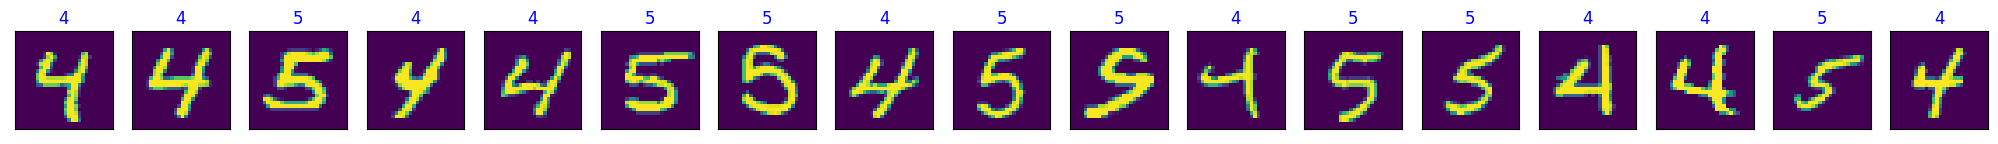

In [14]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels3)):
    ax=fig.add_subplot(2,20,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images3[i]))
    ax.set_title(labels3[i].item(),color='blue')

## Visualizing 6 and 7

In [15]:
train_filter4 = np.where((labels == 6 ) | (labels == 7))
images4, labels4 = images[train_filter4], labels[train_filter4]

print(len(images4), len(labels4))


21 21


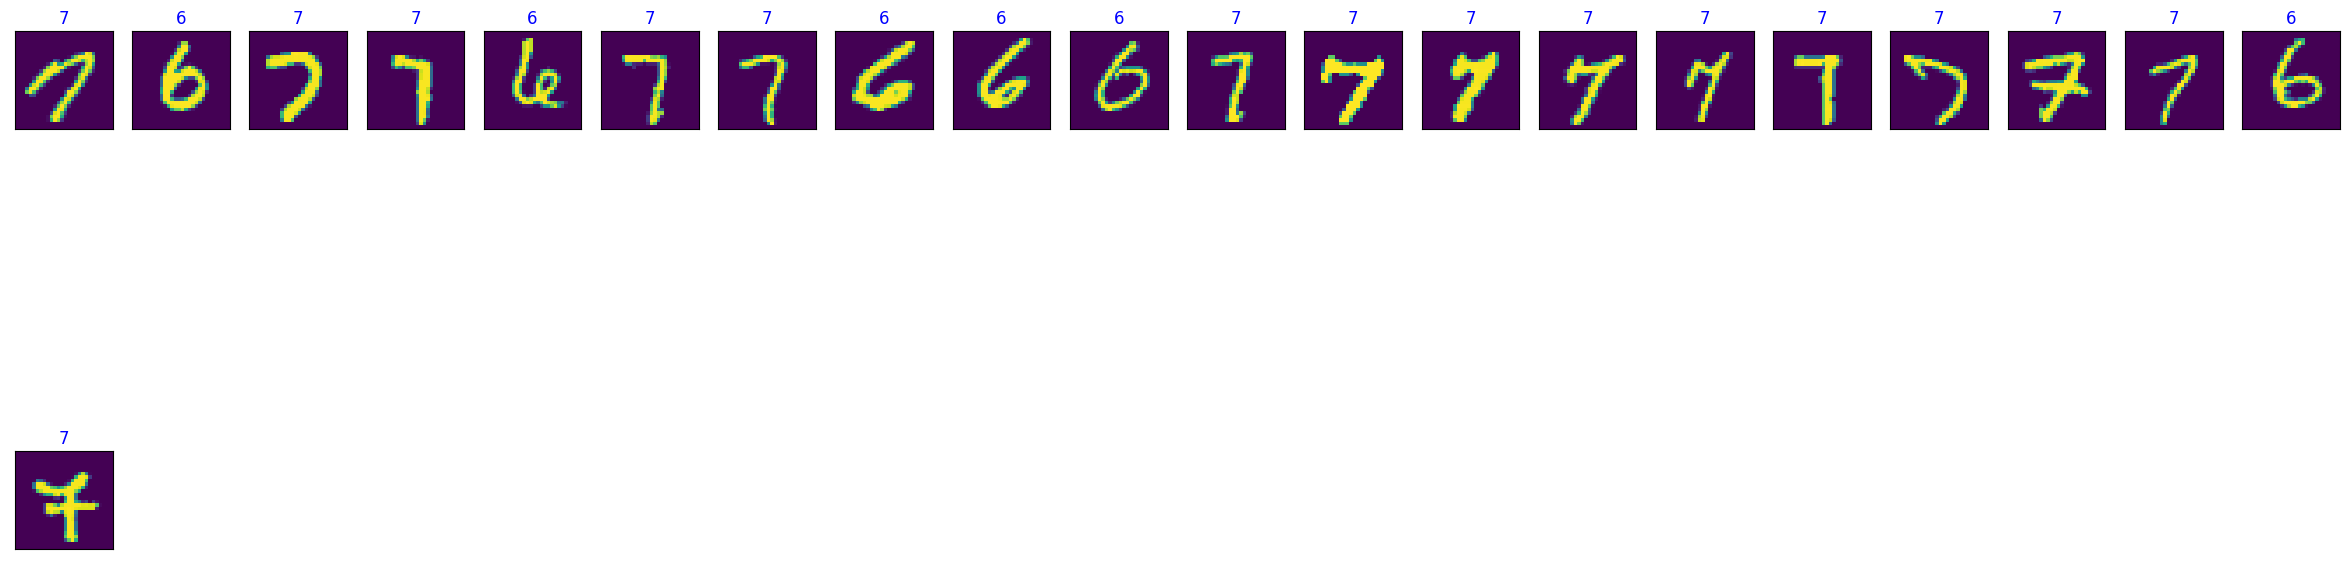

In [16]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels4)):
    ax=fig.add_subplot(2,20,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images4[i]))
    ax.set_title(labels4[i].item(),color='blue')

## Visualizing 8 and 9

In [17]:
train_filter5 = np.where((labels == 8 ) | (labels == 9))
images5, labels5 = images[train_filter5], labels[train_filter5]

print(len(images5), len(labels5))


21 21


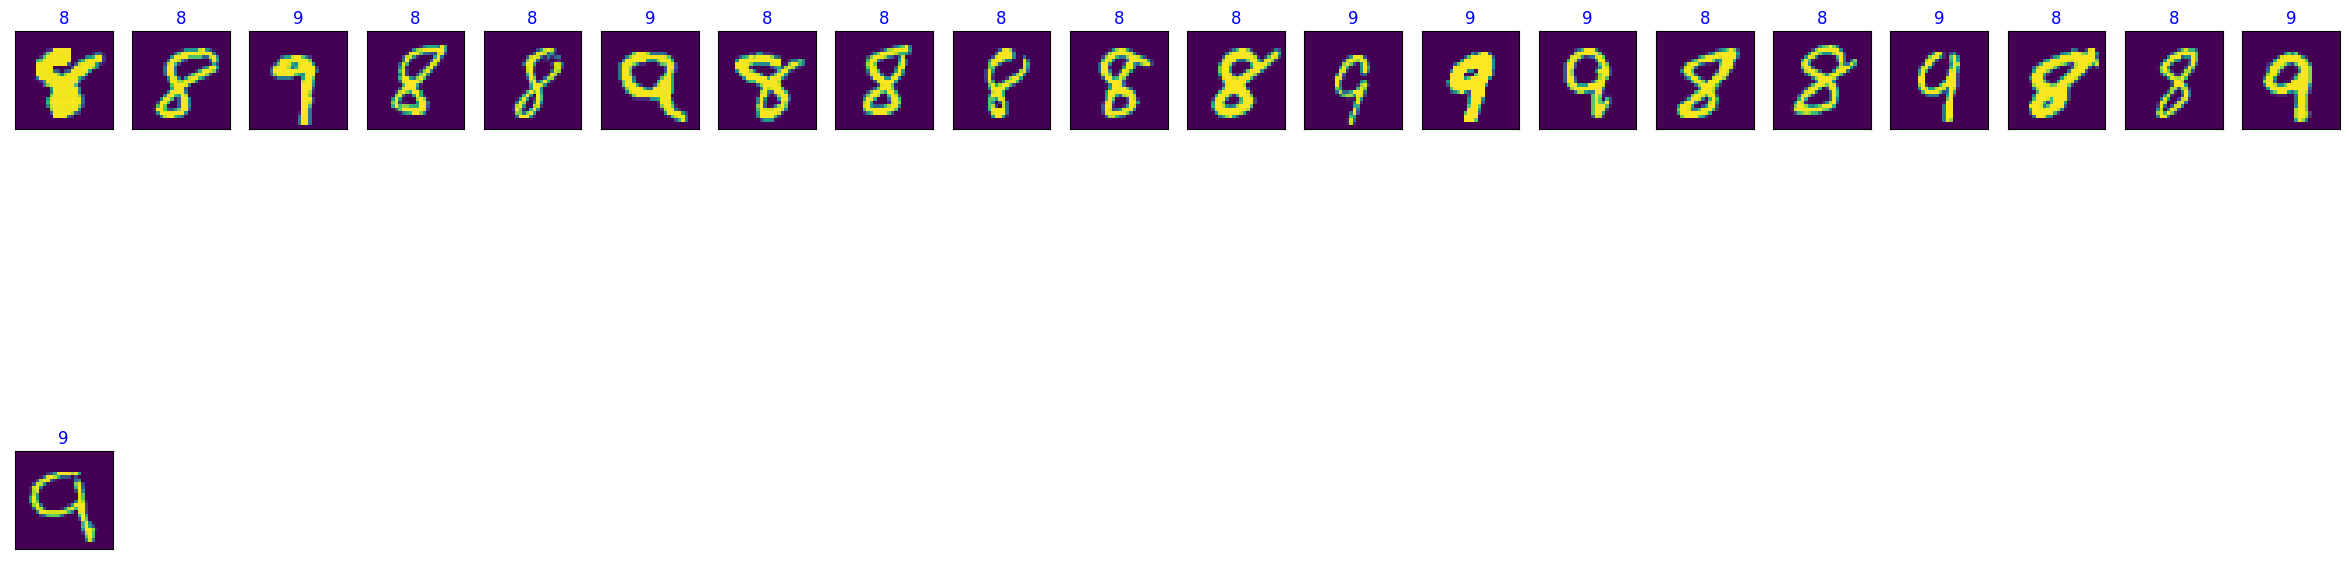

In [18]:
fig=plt.figure(figsize=(30,10))
for i in range(len(labels5)):
    ax=fig.add_subplot(2,20,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images5[i]))
    ax.set_title(labels5[i].item(),color='blue')

## Defining our Neural Net Architecture

In [19]:
model = resnet18(num_classes=10)

def weight_init_normal(m):
    classname=m.__class__.__name__
    if classname.find('Linear')!=-1:
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
model.apply(weight_init_normal)
use_cuda=True
if use_cuda and torch.cuda.is_available():
  model_1.cuda()
  model_2.cuda()


print(model,'\n\n\n\n\n\n\n\n','On GPU : ',torch.cuda.is_available())

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [21]:
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [22]:
criterion=nn.CrossEntropyLoss()

In [23]:
import pytorch_lightning as pl
class ResNetMNIST(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = resnet18(num_classes=10)
    self.model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    self.loss = nn.CrossEntropyLoss()


  def forward(self, x):
    return self.model(x)
  
  def training_step(self, batch, batch_no):
    x, y = batch
    logits = self(x)
    loss = self.loss(logits, y)
    return loss
  
  def configure_optimizers(self):
    return torch.optim.RMSprop(self.parameters(), lr=0.005)

In [24]:
model = ResNetMNIST()

In [25]:
def trainNet1(model):
    
    lr=0.005
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[]}
    epochs=5

    for epoch in range(epochs):
        train_loss=0.0
        
        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images1,labels1 in train_loader:
            if use_cuda and torch.cuda.is_available():
                images1,labels1=images1.cuda(),labels1.cuda()
            optimizer.zero_grad()
            output=model(images1)
            loss=criterion(output,labels1)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        train_loss = train_loss/len(train_loader)
       

        # saving loss values
        loss_keeper['train'].append(train_loss)
       
        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}")
        
    return(loss_keeper)

In [26]:
def trainNet2(model):
    
    lr=0.005
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[]}
    epochs=5

    for epoch in range(epochs):
        train_loss=0.0
        
        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images2,labels2 in train_loader:
            if use_cuda and torch.cuda.is_available():
                images2,labels2=images2.cuda(),labels2.cuda()
            optimizer.zero_grad()
            output=model(images2)
            loss=criterion(output,labels2)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        train_loss = train_loss/len(train_loader)
       

        # saving loss values
        loss_keeper['train'].append(train_loss)
       
        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}")
        
    return(loss_keeper)

In [27]:
def trainNet3(model):
    
    lr=0.005
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[]}
    epochs=5

    for epoch in range(epochs):
        train_loss=0.0
        
        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images3,labels3 in train_loader:
            if use_cuda and torch.cuda.is_available():
                images3,labels3=images3.cuda(),labels3.cuda()
            optimizer.zero_grad()
            output=model(images3)
            loss=criterion(output,labels3)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        train_loss = train_loss/len(train_loader)
       

        # saving loss values
        loss_keeper['train'].append(train_loss)
       
        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}")
        
    return(loss_keeper)

In [28]:
def trainNet4(model):
    
    lr=0.005
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[]}
    epochs=5

    for epoch in range(epochs):
        train_loss=0.0
        
        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images4,labels4 in train_loader:
            if use_cuda and torch.cuda.is_available():
                images4,labels4=images4.cuda(),labels4.cuda()
            optimizer.zero_grad()
            output=model(images4)
            loss=criterion(output,labels4)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        train_loss = train_loss/len(train_loader)
       

        # saving loss values
        loss_keeper['train'].append(train_loss)
       
        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}")
        
    return(loss_keeper)

In [37]:
def trainNet5(model):
    
    lr=0.005
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'train':[]}
    epochs=5

    for epoch in range(epochs):
        train_loss=0.0
        
        """
        TRAINING PHASE
        """
        model.train() # TURN ON DROPOUT for training
        for images5,labels5 in train_loader:
            if use_cuda and torch.cuda.is_available():
                images5,labels5=images5.cuda(),labels5.cuda()
            optimizer.zero_grad()
            output=model(images5)
            loss=criterion(output,labels5)
            loss.backward()
            optimizer.step()
            train_loss+=loss.item()

        train_loss = train_loss/len(train_loader)
       

        # saving loss values
        loss_keeper['train'].append(train_loss)
       
        print(f"\nEpoch : {epoch+1}\tTraining Loss : {train_loss}")
        
    return(loss_keeper)

In [30]:
def ValidNet(model):
    
    lr=0.005
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)


    # Number of epochs to train for
    loss_keeper={'valid':[]}
    epochs=5

    # minimum validation loss ----- set initial minimum to infinity
    valid_loss_min = np.Inf 

    for epoch in range(epochs):
        valid_loss=0.0

        """
        VALIDATION PHASE
        """
        model.eval() # TURN OFF DROPOUT for validation
        for images,labels in valid_loader:
            if use_cuda and torch.cuda.is_available():
                images,labels=images.cuda(),labels.cuda()
            output=model(images)
            loss=criterion(output,labels)
            valid_loss+=loss.item()

        # Calculating loss over entire batch size for every epoch
        
        valid_loss = valid_loss/len(valid_loader)


        # saving loss values
       
        loss_keeper['valid'].append(valid_loss)

        print(f"Validation Loss : {valid_loss}")
        if valid_loss<=valid_loss_min:
            print(f"Validation loss decreased from : {valid_loss_min} ----> {valid_loss} ----> Saving Model.......")
            z=type(model).__name__
            torch.save(model.state_dict(), z+'_model.pth')
            valid_loss_min=valid_loss
    return(loss_keeper)

In [31]:
trainNet1(model)


Epoch : 1	Training Loss : 0.1697956263650364

Epoch : 2	Training Loss : 0.06926493602125751

Epoch : 3	Training Loss : 0.049981505437851105

Epoch : 4	Training Loss : 0.04320881971604346

Epoch : 5	Training Loss : 0.043919096543929


{'train': [0.1697956263650364,
  0.06926493602125751,
  0.049981505437851105,
  0.04320881971604346,
  0.043919096543929]}

In [32]:
trainNet2(model)


Epoch : 1	Training Loss : 0.06235353090693631

Epoch : 2	Training Loss : 0.037349262526428596

Epoch : 3	Training Loss : 0.028766949164977025

Epoch : 4	Training Loss : 0.0244997665368525

Epoch : 5	Training Loss : 0.02244589911466998


{'train': [0.06235353090693631,
  0.037349262526428596,
  0.028766949164977025,
  0.0244997665368525,
  0.02244589911466998]}

In [33]:
trainNet3(model)


Epoch : 1	Training Loss : 0.030456077270567525

Epoch : 2	Training Loss : 0.020627172363030393

Epoch : 3	Training Loss : 0.024835462170419

Epoch : 4	Training Loss : 0.023334341800258094

Epoch : 5	Training Loss : 0.012201848831656056


{'train': [0.030456077270567525,
  0.020627172363030393,
  0.024835462170419,
  0.023334341800258094,
  0.012201848831656056]}

In [34]:
trainNet4(model)


Epoch : 1	Training Loss : 0.018557548119547344

Epoch : 2	Training Loss : 0.013366127685670411

Epoch : 3	Training Loss : 0.012578952128797028

Epoch : 4	Training Loss : 0.010288907065657327

Epoch : 5	Training Loss : 0.011999155972015766


{'train': [0.018557548119547344,
  0.013366127685670411,
  0.012578952128797028,
  0.010288907065657327,
  0.011999155972015766]}

In [38]:
trainNet5(model)


Epoch : 1	Training Loss : 0.013634259909134508

Epoch : 2	Training Loss : 0.008797274844667887

Epoch : 3	Training Loss : 0.009208234203204314

Epoch : 4	Training Loss : 0.008209344509120342

Epoch : 5	Training Loss : 0.0072294847371911905


{'train': [0.013634259909134508,
  0.008797274844667887,
  0.009208234203204314,
  0.008209344509120342,
  0.0072294847371911905]}

In [39]:
ValidNet(model)

Validation Loss : 0.046210865375908364
Validation loss decreased from : inf ----> 0.046210865375908364 ----> Saving Model.......
Validation Loss : 0.04621086464739695
Validation loss decreased from : 0.046210865375908364 ----> 0.04621086464739695 ----> Saving Model.......
Validation Loss : 0.04621086496431559
Validation Loss : 0.04621086439535607
Validation loss decreased from : 0.04621086464739695 ----> 0.04621086439535607 ----> Saving Model.......
Validation Loss : 0.04621086482862514


{'valid': [0.046210865375908364,
  0.04621086464739695,
  0.04621086496431559,
  0.04621086439535607,
  0.04621086482862514]}

In [40]:
def test(model):
    correct=0
    test_loss=0
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval() # test the model with dropout layers off
    for images,labels in test_loader:
        if use_cuda and torch.cuda.is_available():
            images,labels=images.cuda(),labels.cuda()
        output=model(images)
        loss=criterion(output,labels)
        test_loss+=loss.item()
        _,pred=torch.max(output,1)
        correct = np.squeeze(pred.eq(labels.data.view_as(pred)))

        for i in range(batch_size):
            label = labels.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1


    test_loss=test_loss/len(test_loader)
    print(f'For {type(model).__name__} :')
    print(f"Test Loss: {test_loss}")
    print(f"Correctly predicted per class : {class_correct}, Total correctly perdicted : {sum(class_correct)}")
    print(f"Total Predictions per class : {class_total}, Total predictions to be made : {sum(class_total)}\n")
    for i in range(10):
      if class_total[i] > 0:
          print(f"Test Accuracy of class {i} : {float(100 * class_correct[i] / class_total[i])}% where {int(np.sum(class_correct[i]))} of {int(np.sum(class_total[i]))} were predicted correctly")
      else:
          print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

    print(f"\nOverall Test Accuracy : {float(100. * np.sum(class_correct) / np.sum(class_total))}% where {int(np.sum(class_correct))} of {int(np.sum(class_total))} were predicted correctly")
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, labels = dataiter.next()

    # get sample outputs
    if use_cuda and torch.cuda.is_available():
      images,labels=images.cuda(),labels.cuda()
    output = model(images)
    # convert output probabilities to predicted class
    _, preds = torch.max(output, 1)
    # prep images for display
    images = images.cpu().numpy()

    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(25, 4))
    for idx in np.arange(20):
        ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(images[idx]))
        ax.set_title("{} for ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                    color=("blue" if preds[idx]==labels[idx] else "red"))

In [41]:
test(model)

For ResNetMNIST :
Test Loss: 0.0363844432597691
Correctly predicted per class : [978.0, 1130.0, 1027.0, 1008.0, 965.0, 884.0, 946.0, 1017.0, 965.0, 997.0], Total correctly perdicted : 9917.0
Total Predictions per class : [980.0, 1135.0, 1032.0, 1010.0, 982.0, 892.0, 958.0, 1028.0, 974.0, 1009.0], Total predictions to be made : 10000.0

Test Accuracy of class 0 : 99.79591836734694% where 978 of 980 were predicted correctly
Test Accuracy of class 1 : 99.55947136563877% where 1130 of 1135 were predicted correctly
Test Accuracy of class 2 : 99.51550387596899% where 1027 of 1032 were predicted correctly
Test Accuracy of class 3 : 99.8019801980198% where 1008 of 1010 were predicted correctly
Test Accuracy of class 4 : 98.26883910386965% where 965 of 982 were predicted correctly
Test Accuracy of class 5 : 99.10313901345292% where 884 of 892 were predicted correctly
Test Accuracy of class 6 : 98.74739039665971% where 946 of 958 were predicted correctly
Test Accuracy of class 7 : 98.92996108949

AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'